# Convert GPS-tracked bus movement data from JSON to GeoJSON format

*Written by Men Vuthy, 2022*

---


### Objective



*   The objective is to convert the JSON file of GPS data which recorded the movement of city bus in Phnom Penh to GeoJSON file format for analysis in GIS.



File content before conversion:

![img](img-markdown/image-1.png "Title")

### Environment

In [ ]:
!pip install geopandas
!pip install contextily
!pip install mapclassify

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Bus

/content/drive/MyDrive/Colab Notebooks/Bus


### Code

In [3]:
# Import necessary module
import json
import geopandas as gpd

In [4]:
# Read json file
input_file = json.load(open("data.json", "r", encoding="utf-8"))

In [5]:
# Check properties of data

# Check length
print('The length of data is', len(input_file))

# Check variables
print('The variables of first data:')
input_file[0]

The length of data is 13010
The variables of first data:


{'_id': {'$oid': '625ce66611021109ba081525'},
 'device_id': '0358735074119172',
 'date': '1604120c0a11',
 'set_count': 'cf',
 'latitude_raw': '013db852',
 'longitude_raw': '0b41b0c0',
 'latitude': 11.567832222222222,
 'longitude': 104.91914666666666,
 'speed': 15,
 'orientation': 'd4ef',
 'lbs': '01c808273a002b33',
 'device_info': '00000010',
 'power': '0f',
 'gsm': 'a8',
 'alert': '0d',
 'power_status': '0',
 'gps_status': '0',
 'charge_status': '0',
 'acc_status': '1',
 'defence_status': '0',
 'from_cmd': 'ping',
 'location': {'type': 'Point',
  'coordinates': [104.91914666666666, 11.567832222222222]},
 'timespan': '2022-04-18 04:17:42',
 'last_submit': '2022-04-18 04:17:42'}

As seen above, the variables inside data properties are not in GeoJSON format. Thus, we need to rearrange them to a proper GeoJSON property file format. 

The format can be referred to https://geojson.io/#map=2/20.0/0.0.

In [9]:
# Code to rearange the variable to correct format of GeoJSON
geojs = {
     "type": "FeatureCollection",
     "features":[
           {
                "type":"Feature",
                "properties": {
                    '_id': d["_id"],
                    'acc_status': d["acc_status"],
                    'alert': d["alert"],
                    'charge_status': d["charge_status"],
                    'date': d["date"],
                    'defence_status': d["defence_status"],
                    'device_id': d["device_id"],
                    'device_info': d["device_info"],
                    'from_cmd': d["from_cmd"],
                    'gps_status': d["gps_status"],
                    'gsm': d["gsm"],
                    'last_submit': d["last_submit"],
                    'latitude': d["latitude"],
                    'latitude_raw': d["latitude_raw"],
                    'lbs': d["lbs"],
                    'location': d["location"],
                    'longitude': d["longitude"],
                    'longitude_raw': d["longitude_raw"],
                    'orientation': d["orientation"],
                    'power': d["power"],
                    'power_status': d["power_status"],
                    'set_count': d["set_count"],
                    'speed': d["speed"],
                    'timespan': d["timespan"]
                    }, 

                "geometry": {
                "type":"Point",
                "coordinates": d["location"]["coordinates"],
            }      
         } for d in input_file 
    ]  
 }

# Save to a new file
output_file=open("geodata.json", "w", encoding="utf-8")
json.dump(geojs, output_file)

File content after conversion:

![img](img-markdown/image-2.png "Title")

Read newly-created GeoJSON file and visualize speed data

In [10]:
# Read newly-created GeoJSON file
df = gpd.read_file('geodata.json')
df.head()

,_id,acc_status,alert,charge_status,date,defence_status,device_id,device_info,from_cmd,gps_status,...,location,longitude,longitude_raw,orientation,power,power_status,set_count,speed,timespan,geometry
0,{'$oid': '625ce66611021109ba081525'},1,0d,0,1604120c0a11,0,0358735074119172,00000010,ping,0,...,"{'type': 'Point', 'coordinates': [104.91914666...",104.919147,0b41b0c0,d4ef,0f,0,cf,15,2022-04-18T04:17:42,POINT (104.91915 11.56783)
1,{'$oid': '625ce6d511021178ef08168e'},1,0d,1,1604120c0c2e,1,0358735074119172,00100111,ping,0,...,"{'type': 'Point', 'coordinates': [104.91769777...",104.917698,0b41a690,d4e6,be,0,cf,22,2022-04-18T04:19:33,POINT (104.91770 11.56665)
2,{'$oid': '625ce6d611021175dd081693'},1,0d,0,1604120c0e33,1,0358735074119172,00101011,ping,0,...,"{'type': 'Point', 'coordinates': [104.91549333...",104.915493,0b419710,d4e5,fd,0,cf,8,2022-04-18T04:19:34,POINT (104.91549 11.56489)
3,{'$oid': '625ce6d8110211c581081699'},0,0d,1,1604120c0f2e,0,0358735074119172,00000100,ping,0,...,"{'type': 'Point', 'coordinates': [104.91375111...",104.913751,0b418ad0,d4e6,d8,0,cf,12,2022-04-18T04:19:36,POINT (104.91375 11.56349)
4,{'$oid': '625ce6d9110211599f08169c'},0,0d,0,1604120c1124,1,0358735074119172,00111001,ping,0,...,"{'type': 'Point', 'coordinates': [104.91170666...",104.911707,0b417c70,d4d8,42,0,cf,24,2022-04-18T04:19:37,POINT (104.91171 11.56169)


In [11]:
# Check coordinate reference system
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

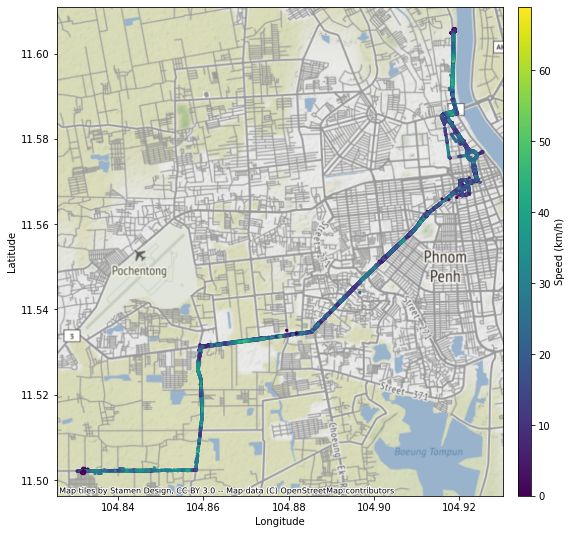

In [12]:
# Import function for customizing legend
import contextily as ctx
import mapclassify
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Initialize subplots
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# customize legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)

# add legend
df.plot(ax=ax, column = 'speed', markersize = 5, marker = "o",
          cmap="viridis",
          cax=cax,
          legend=True, legend_kwds={'label': "Speed (km/h)"})

ctx.add_basemap(ax, crs=df.crs.to_string())